In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'D:/Data Science/Car Brand/Datasets/train'
valid_path = 'D:/Data Science/Car Brand/Datasets/test'

In [4]:
# Import the Resnet50 library as shown below and add preprocessing layer to the front of Resnet50",
# Here we will be using imagenet weights\n"
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights\n",
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('D:/Data Science/Car Brand/Datasets/train/*')
len(folders)

3

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction=Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/Data Science/Car Brand/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('D:/Data Science/Car Brand/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 16s 8s/step - loss: 6.6159 - accuracy: 0.3594 - val_loss: 4.5437 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 13s 6s/step - loss: 8.6458 - accuracy: 0.2812 - val_loss: 5.8969 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 13s 6s/step - loss: 6.2309 - accuracy: 0.3281 - val_loss: 7.3459 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 13s 6s/step - loss: 4.5790 - accuracy: 0.3438 - val_loss: 2.3450 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 13s 6s/step - loss: 1.9360 - accuracy: 0.3906 - val_loss: 1.9226 - val_accuracy: 0.5345
Epoch 6/50
2/2 [==============================] - 13s 6s/step - loss: 2.6775 - accuracy: 0.4844 - val_loss: 1.7414 - val_accuracy: 0.5345
Epoch 7/50
2/2 [==============================] - 13s 6s/step - loss: 1.4632 - accuracy: 0.5312 

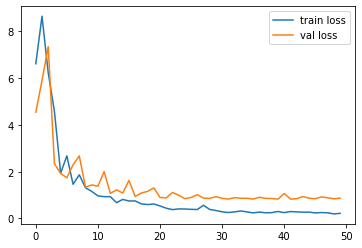

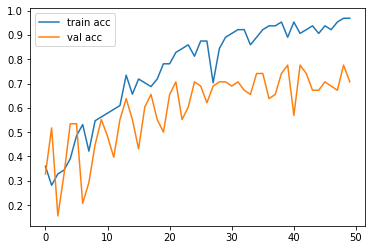

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('car_model_resnet50.h5')

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[7.09280837e-03, 9.19363916e-01, 7.35433549e-02],
       [2.92369407e-02, 2.80471742e-01, 6.90291345e-01],
       [2.73023546e-02, 6.53547108e-01, 3.19150507e-01],
       [4.38400894e-01, 2.96490818e-01, 2.65108258e-01],
       [3.58193249e-01, 3.52653414e-01, 2.89153308e-01],
       [2.37194300e-02, 5.05799986e-03, 9.71222639e-01],
       [8.09267640e-01, 9.38703790e-02, 9.68619362e-02],
       [1.37838451e-02, 4.77971971e-01, 5.08244216e-01],
       [3.04491855e-02, 1.33653462e-01, 8.35897386e-01],
       [2.22589483e-06, 4.69927036e-04, 9.99527812e-01],
       [1.61403008e-02, 2.59060055e-01, 7.24799633e-01],
       [3.31995599e-02, 7.07851768e-01, 2.58948743e-01],
       [2.33560081e-06, 8.45921168e-05, 9.99913096e-01],
       [6.87244115e-03, 2.23200725e-04, 9.92904365e-01],
       [6.25733316e-01, 2.70018220e-01, 1.04248531e-01],
       [1.79134503e-01, 7.74965167e-01, 4.59003113e-02],
       [5.75892860e-03, 4.09902066e-01, 5.84339082e-01],
       [4.04369645e-02, 1.51300

In [20]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('car_model_resnet50.h5')

In [33]:
img=image.load_img('D:/Data Science/Car Brand/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [34]:
y=image.img_to_array(img)
y

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [35]:
y.shape

(224, 224, 3)

In [36]:
import tensorflow as tf

In [37]:
y=np.expand_dims(y,axis=0)
img_brand=preprocess_input(x)
img_brand.shape

(1, 224, 224, 3)

In [38]:
img_brand=img_brand/255

In [39]:
preds=model.predict(img_brand)
preds

array([[6.3233130e-04, 9.9507916e-01, 4.2884536e-03]], dtype=float32)

In [40]:
a=np.argmax(preds, axis=1)

In [41]:
a

array([1], dtype=int64)

In [42]:
if(a==0):
    print('Audi')
elif(a==1):
    print('Lumborghini')
elif(a==2):
    print('Mercedes')

Lumborghini
